# Use cytoscape

In [1]:
import rdflib
from SPARQLWrapper import SPARQLWrapper, JSON, TURTLE

In [2]:
uniprot_query = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcterms: <http://purl.org/dc/terms/>

PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX uniprot: <http://purl.uniprot.org/uniprot/>
PREFIX up:<http://purl.uniprot.org/core/>

SELECT * WHERE {
    VALUES ?P1 {uniprot:Q14524}
    ?P1 up:mnemonic ?P1_label .
    ?P1 up:organism ?org .
    ?P1 up:interaction ?interaction .
    ?P2 up:interaction ?interaction .
    ?P2 up:mnemonic ?P2_label .
    ?interaction up:experiments ?nb_expe
    # FILTER (?P2 != ?P1)
} limit 10

"""

sparql = SPARQLWrapper("http://sparql.uniprot.org/sparql/")
sparql.setQuery(uniprot_query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
print(results['results']['bindings'])

list_of_genes = ["SCN5A"]
for r in results['results']['bindings']:
    print(f"{r['P1_label']['value']} <-> {r['P2_label']['value']} in {r['nb_expe']['value']} experiments.")
    # print(f"r")
    list_of_genes.append(r['P2_label']['value'].split("_HUMAN")[0])

list_of_genes

[{'P1': {'type': 'uri', 'value': 'http://purl.uniprot.org/uniprot/Q14524'}, 'nb_expe': {'datatype': 'http://www.w3.org/2001/XMLSchema#int', 'type': 'literal', 'value': '3'}, 'P2': {'type': 'uri', 'value': 'http://purl.uniprot.org/uniprot/Q14524'}, 'org': {'type': 'uri', 'value': 'http://purl.uniprot.org/taxonomy/9606'}, 'P2_label': {'type': 'literal', 'value': 'SCN5A_HUMAN'}, 'interaction': {'type': 'uri', 'value': 'http://purl.uniprot.org/intact/11524452-14276801'}, 'P1_label': {'type': 'literal', 'value': 'SCN5A_HUMAN'}}, {'P1': {'type': 'uri', 'value': 'http://purl.uniprot.org/uniprot/Q14524'}, 'nb_expe': {'datatype': 'http://www.w3.org/2001/XMLSchema#int', 'type': 'literal', 'value': '3'}, 'P2': {'type': 'uri', 'value': 'http://purl.uniprot.org/uniprot/Q8N9N5'}, 'org': {'type': 'uri', 'value': 'http://purl.uniprot.org/taxonomy/9606'}, 'P2_label': {'type': 'literal', 'value': 'BANP_HUMAN'}, 'interaction': {'type': 'uri', 'value': 'http://purl.uniprot.org/intact/11524452-14276801'}, 

['SCN5A',
 'SCN5A',
 'BANP',
 'EMC9',
 'SCN5A',
 'SCN5A',
 'FGF12',
 'SCN5A',
 'KCC2D',
 'PTN3',
 'SCN5A']

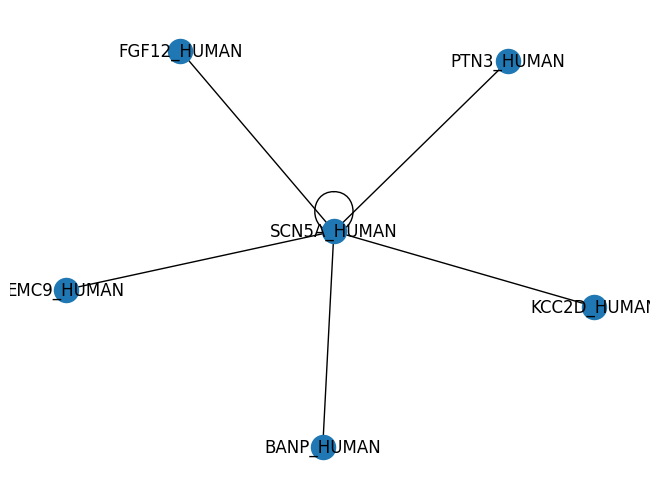

In [3]:
import networkx as nx
from matplotlib import pyplot as plt

G = nx.Graph()

for r in results['results']['bindings']:
    G.add_edge(r['P1_label']['value'], r['P2_label']['value'], nbExperiments = r['nb_expe']['value'])

nx.draw(G, with_labels= True)
plt.show()   

In [4]:
import ipycytoscape
import ipywidgets as widgets
from ipycytoscape import CytoscapeWidget
import networkx as nx

In [5]:
cytoscapeobj = ipycytoscape.CytoscapeWidget()

In [6]:
cytoscapeobj.graph.add_graph_from_networkx(G)

In [7]:
cytoscapeobj.set_style([{
                        'selector': 'node',
                        'css': {
                            'content': 'data(name)',
                            'text-valign': 'center',
                            'color': 'white',
                            'text-outline-width': 2,
                            'text-outline-color': 'green',
                            'background-color': 'green'
                        }
                        },
                        {
                        'selector': ':selected',
                        'css': {
                            'background-color': 'black',
                            'line-color': 'black',
                            'target-arrow-color': 'black',
                            'source-arrow-color': 'black',
                            'text-outline-color': 'black'
                        }}
                        ])
cytoscapeobj

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'content': 'd…

In [8]:
nodes = []
edges = []
# { 'data': { 'id': 'desktop', 'name': 'Cytoscape', 'href': 'http://cytoscape.org' } },
# {'data': { 'source': 'desktop', 'target': 'js' }},

# G.add_edge(r['P1_label']['value'], r['P2_label']['value'], nbExperiments = r['nb_expe']['value'])
for r in results['results']['bindings']:
    nodes.append({
        'id' : r['P2_label']['value'], 'name':  r['P2_label']['value'], 'href': r['P2']['value']
    })
    edges.append(
        {'data': { 'source': r['P1_label']['value'], 'target': r['P2_label']['value'] }}
    )

data = {
    'edges':edges,
    'nodes': nodes
}

cytoscapeobj = ipycytoscape.CytoscapeWidget()
cytoscapeobj.graph.add_graph_from_json(data)
cytoscapeobj.set_style([{
                        'selector': 'node',
                        'css': {
                            'content': 'data(name)',
                            'text-valign': 'center',
                            'color': 'white',
                            'text-outline-width': 2,
                            'text-outline-color': 'green',
                            'background-color': 'green'
                        }
                        },
                        {
                        'selector': ':selected',
                        'css': {
                            'background-color': 'black',
                            'line-color': 'black',
                            'target-arrow-color': 'black',
                            'source-arrow-color': 'black',
                            'text-outline-color': 'black'
                        }}
                        ])

cytoscapeobj

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'content': 'd…